In [1]:
%matplotlib inline
import seaborn as sns
import openml as oml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.ticker import FormatStrFormatter
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import random
from scipy.io import savemat
plt.rcParams['figure.dpi']= 120
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8 


import sys

import os
os.getcwd() # get current working directory

'D:\\MasterStudy\\2017-2018\\GraduationProject\\Bin'

In [2]:
from IPython.core.display import display, HTML

from bayesian.bin import abda
import pprint
import warnings
warnings.filterwarnings('ignore')

D:\Programfiles\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = oml.datasets.get_dataset(897)  # typical datasets 985 4 897
X, y, features = data.get_data(target=data.default_target_attribute, return_attribute_names=True)
Xy = data.get_data()
Xy

array([[1.061e+03, 0.000e+00, 2.000e+00, ..., 9.000e+00, 4.000e+00,
        0.000e+00],
       [1.063e+03, 0.000e+00, 0.000e+00, ..., 1.180e+02, 4.000e+01,
        1.000e+00],
       [1.065e+03, 0.000e+00, 1.000e+00, ..., 2.000e+01, 9.000e+00,
        0.000e+00],
       ...,
       [3.830e+03, 4.900e+01, 2.000e+00, ..., 2.400e+01, 3.000e+00,
        0.000e+00],
       [3.831e+03, 4.900e+01, 2.000e+00, ..., 2.500e+01, 1.200e+01,
        0.000e+00],
       [3.932e+03, 5.100e+01, 0.000e+00, ..., 1.640e+02, 2.000e+00,
        1.000e+00]], dtype=float32)

## Important Features

In [4]:
def build_forest(X, y):
    forest = Pipeline([('Imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('classifiers', RandomForestClassifier(n_estimators=100, random_state=0))])
    forest.fit(X,y)
    
    importances = forest.steps[1][1].feature_importances_
    indices = np.argsort(importances)[::-1]
    return importances, indices

def plot_feature_importances(dataset_name, features, importances, indices):
    a = 0.8
    f_sub = []
    max_features = 20

    for f in range(min(len(features), max_features)): 
            f_sub.append(f)

    # Create a figure of given size
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    # Set title
    ttl = dataset_name

    df = pd.DataFrame(importances[indices[f_sub]][::-1])
    df.plot(kind='barh', ax=ax, alpha=a, legend=False, edgecolor='w', 
            title=ttl, color = [plt.cm.viridis(np.arange(len(df))*10)])

    # Remove grid lines and plot frame
    ax.grid(False)
    ax.set_frame_on(False)

    # Customize title
    ax.set_title(ax.get_title(), fontsize=14, alpha=a, ha='left', x=0, y=1.0)
    plt.subplots_adjust(top=0.9)

    # Customize x tick lables
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.locator_params(axis='x', tight=True, nbins=5)

    # Customize y tick labels
    yticks = np.array(features)[indices[f_sub]][::-1]
    ax.set_yticklabels(yticks, fontsize=8, alpha=a)
    ax.yaxis.set_tick_params(pad=2) 
    ax.yaxis.set_ticks_position('none') 
    ax.set_ylim(ax.get_ylim()[0]-0.5, ax.get_ylim()[1]+0.5) 

    # Set x axis text
    xlab = 'Feature importance'
    ax.set_xlabel(xlab, fontsize=10, alpha=a)
    ax.xaxis.set_label_coords(0.5, -0.1)

    # Set y axis text
    ylab = 'Feature'
    ax.set_ylabel(ylab, fontsize=10, alpha=a)
    plt.show()

def show_important_features(X, y, data_name, features):
    display(HTML('<h2>Important Features</h2>'))
    importances, indices = build_forest(X, y)
    plot_feature_importances(data_name, features, importances, indices)

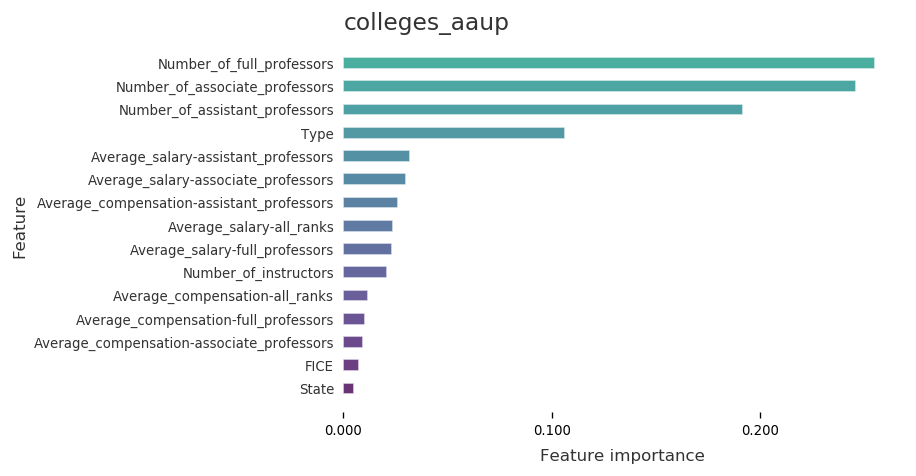

In [5]:
show_important_features(X, y, data.name, features)

## Statistical Information

In [6]:
def show_statistical_info(Xy):
    display(HTML('<h2>Statistical Information</h2>'))
    df = pd.DataFrame(Xy)
    display(df.describe())

In [7]:
show_statistical_info(Xy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1161.000000,1161.000000,1161.000000,1093.000000,1125.000000,1137.000000,1161.000000,1093.000000,1125.000000,1137.000000,1161.000000,1161.000000,1161.00000,1161.000000,1161.000000,1161.000000
mean,3052.047363,26.377260,1.378122,524.144531,416.395569,351.927002,420.370361,653.487671,523.792908,442.112579,526.693359,95.096466,72.38501,68.634796,12.735573,0.299742
std,2411.622559,13.666818,0.739875,118.315216,71.542603,54.784206,92.286728,151.754730,97.083755,75.464302,120.694603,142.588501,89.42012,72.803047,19.514076,0.458341
min,1002.000000,0.000000,0.000000,270.000000,234.000000,199.000000,232.000000,319.000000,292.000000,246.000000,265.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1903.000000,15.000000,1.000000,440.000000,367.000000,313.000000,352.000000,547.000000,456.000000,389.000000,436.000000,18.000000,19.00000,21.000000,2.000000,0.000000
50%,2668.000000,27.000000,2.000000,506.000000,413.000000,349.000000,407.000000,635.000000,519.000000,437.000000,510.000000,40.000000,38.00000,40.000000,6.000000,0.000000
75%,3420.000000,38.000000,2.000000,600.000000,461.000000,388.000000,475.000000,753.000000,583.000000,493.000000,600.000000,105.000000,89.00000,92.000000,14.000000,1.000000
max,29269.000000,51.000000,3.000000,1009.000000,733.000000,576.000000,866.000000,1236.000000,909.000000,717.000000,1075.000000,997.000000,721.00000,510.000000,178.000000,1.000000


## Data Types

In [8]:
# hide print       
class NoStdStreams(object):
    def __init__(self,stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

In [9]:
def infer_feature_type(feature):
    """
    Infer data types for the given feature using simple logic
    Possible data types to infer: boolean, date, float, integer, string
    Feature that is not either a boolean, a date, a float or an integer, is classified as a string
    """
    data_type = ""
    types = ["date","float64","int64","string"]
    weights = [0,0,0,0] #Weights corresponding to the data types
    feature_len = len(feature)
    
    indices_number = int(0.1 * feature_len) #Number of different values to check in a feature
    indices = random.sample(range(0,feature_len), min(indices_number,feature_len)) #Array of random indices
    
    # If the feature only contains two different unique values, then infer it as boolean
    if len(pd.unique(feature)) == 2:
        data_type = "bool"
    else:
        for i in indices:
            try:
                if (len(feature[i]) <= 10 
                    and (((feature[i][2:3]=='-' or feature[i][2:3]=='/') 
                    and (feature[i][5:6]=='-' or feature[i][5:6]=='/')) 
                    or ((feature[i][4:5]=='-' or feature[i][4:5]=='/')
                    and (feature[i][7:8]=='-' or feature[i][7:8]=='/')))):
                    weights[0] += 1 #Date
                else:
                    weights[3] += 1 #String
            except (TypeError,ValueError,IndexError):
                try:
                    int(feature[i]) # numeric
                    if ('.' in str(feature[i])):
                        if isinstance(feature[i], np.float64):
                            if feature[i].is_integer():
                                weights[2] += 1 # Integer
                            else:
                                weights[1] += 1 # Float
                        else:
                            weights[1] += 1 # Float
                    else:
                        weights[2] += 1 #Integer
                except (TypeError,ValueError,IndexError):
                    weights[3] += 1 #String
#         print ("Date: {}, Float64: {}, Int64: {}, String: {}".format(weights[0],weights[1],weights[2],weights[3])) #For debugging purposes
        data_type = types[weights.index(max(weights))]
        
    return data_type

def discover_type_heuristic(data):
    """
    Automatically infer data types for each feature in the dataframe using simple logic
    ---
    input:

    data : numpy array or dataframe (numeric data needs to be 64 bit)
        
    """
#     df = pd.DataFrame(data)
#     print(df)
    result = []
    if isinstance(data, np.ndarray):
        # convert float32 to float64
        data = np.array(data, dtype='float64')
        df = pd.DataFrame(data)
    else:
        df = data

    for column in df.columns:        
        #print ("Trying to automatically infer the data type of the",column,"feature...") #For debugging purposes
        type_inferred = infer_feature_type(df[column])
        result.append(type_inferred)
        #print ("Result:",inferredType) #For debugging purposes
    return result

In [10]:
def generate_mat(Xy, extra_cardinality=1):
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    data = imp_mean.fit_transform(Xy)
    
    simple_types = discover_type_heuristic(data)
    # map simple types to meta types
    # 1: real (w positive: all real | positive | interval)
    # 2: real (w/o positive: all real | interval)
    # 3: binary data
    # 4: discrete (non-binary: categorical | ordinal | count)
    # note: for now, the implemented bayesian method version by isabel can distinguish between real, postive real, categorical and count
    # the binary data should be mapped to meta type 4 discrete instead of meta type 3 due to the limited implemented version. This may change
    # if the extended version has been implemented by isabel.
    
    
    
    meta_types = [] 
    for i in range(len(simple_types)):
#         print(simple_types[i])
        if simple_types[i] == "bool":
            meta_types.append(4) # may change in the future
        elif simple_types[i] == "int64" or simple_types[i] == "float64":
            if (len(np.unique(data[:,i])) < 0.02 * len(data[:,i]) and len(np.unique(data[:,i])) < 50):
                meta_types.append(4)
            else:
                if (data[:,i] > 0).all():
                    meta_types.append(1)
                else:
                    meta_types.append(2)
        else:
            meta_types.append(1)
    discrete_cardinality = [] # number of unique for discrete feature, 1 for others
    for i in range(len(meta_types)):
        if (meta_types[i] == 4):
            discrete_cardinality.append(int(np.max(data[:,i])) + extra_cardinality) 
        else:
            discrete_cardinality.append(1)
    data_dict = {'X': data,
                 'T': np.asarray(meta_types),
                 'R': np.asarray(discrete_cardinality)}
    pprint.pprint(data_dict)
    savemat('bayesian/data/temp/data.mat', data_dict, oned_as='row')

def discover_type_bayesian(Xy):
    """
    Retrieve the key with the higher value from 'weights'
    The retrieved key is the statisical type of the corresponding feature
    
    ---
    input:

    Xy : numpy array
    
    """

    statistical_types = []
    generate_mat(Xy)
#     with HiddenPrints():
    with NoStdStreams():
        print("This will not be printed")
        weights = abda.main(seed=1337, dataset='bayesian/data/temp/data.mat', exp_id=None, args_output='./exp/temp/', args_miss=None, verbose=1,
         args_col_split_threshold=0.8, args_min_inst_slice=500, args_leaf_type='pm',
         args_type_param_map='spicky-prior-1', args_param_init='default', args_param_weight_init='uniform',
         args_n_iters=10, args_burn_in=4000, args_w_unif_prior=100, args_save_samples=1,
         args_ll_history=1, args_omega_prior='uniform', args_plot_iter=10, args_omega_unif_prior=10,
         args_leaf_omega_unif_prior=0.1, args_cat_unif_prior=1);
    for i in range(len(weights)):
#         print(max(weights[i], key=weights[i].get))
        statistical_types.append(str(max(weights[i], key=weights[i].get)))
    return statistical_types

In [11]:
def discover_types(Xy):
    """
    Discover types for numpy array
    
    """
    display(HTML('<h2>Data Types</h2>'))
    
    display(HTML('<h4>Simple Data Types</h4>'))
    print(discover_type_heuristic(Xy))
    display(HTML('<h4>Statistical Data Types</h4>'))
    print(discover_type_bayesian(Xy))
    

In [12]:
discover_types(Xy)

['int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'bool']


{'R': array([1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]),
 'T': array([1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4]),
 'X': array([[1.061e+03, 0.000e+00, 2.000e+00, ..., 9.000e+00, 4.000e+00,
        0.000e+00],
       [1.063e+03, 0.000e+00, 0.000e+00, ..., 1.180e+02, 4.000e+01,
        1.000e+00],
       [1.065e+03, 0.000e+00, 1.000e+00, ..., 2.000e+01, 9.000e+00,
        0.000e+00],
       ...,
       [3.830e+03, 4.900e+01, 2.000e+00, ..., 2.400e+01, 3.000e+00,
        0.000e+00],
       [3.831e+03, 4.900e+01, 2.000e+00, ..., 2.500e+01, 1.200e+01,
        0.000e+00],
       [3.932e+03, 5.100e+01, 0.000e+00, ..., 1.640e+02, 2.000e+00,
        1.000e+00]], dtype=float32)}
['Type.POSITIVE', 'Type.POSITIVE', 'Type.CATEGORICAL', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.POSITIVE', 'Type.COUNT']


## Duplicated rows

In [13]:
def clean_duplicated_rows(dataframe):
    """
    Clean duplicated rows
    """
    display(HTML('<h2>Duplicated Rows</h2>'))
    
    print("Identifying Duplicated Rows ...")
    
    # Mark duplicated rows with True
    mark = dataframe.duplicated(keep=False)
    #print(mark)
    
    # Duplicated rows detected then set duplicated 'True' 
    duplicated = False
    for bool in mark:
        if bool:
            duplicated = True
    
    # Show duplicated rows if there are
    # Otherwise show no duplicated rows
    if duplicated:
        print("")
        display(HTML('<bold>Duplicated rows are detected.</bold>'))
        print("")
        print(dataframe[mark])
        print("")
        ans = input('Do you want to drop the duplicated rows? [y/n]')
        if ans == 'y':
            dataframe_no_duplicate = drop_duplicated_rows(dataframe)
            print("")
            print("Duplicated rows are dropped.")
            print("")
            return dataframe_no_duplicate
        else:
            print("")
            print("Duplicated rows are kept.")
            print("")
            return dataframe
    else:
        print("")
        display(HTML('<bold>No duplicated rows detected.</bold>'))
        print("")
        return dataframe

def drop_duplicated_rows(dataframe):
    """
    Drop duplicatd rows
    """
    # Drop the duplicates
    dataframe_no_duplicate = dataframe.drop_duplicates()
    #print(dataframe_no_duplicate)
    return dataframe_no_duplicate

In [14]:
df_no_duplicate = clean_duplicated_rows(pd.DataFrame(Xy))

Identifying Duplicated Rows ...



## Inconsistent Column Names

In [15]:
def unify_name_consistency(names):
    """
    Unify inconsistent column names
    """
    display(HTML('<h2>Inconsitent Column Names</h2>'))
    print("")
    print("Column names")
    print("============")
    print(names)
    print("")
    
    if all(col[0].isupper() for col in names):
        print("Column names are consistent")
    elif all(col[0].islower() for col in names):
        print("Column names are consistent")
    else:
        display(HTML('<bold>Column names are not consistent</bold>'))
        ans = input("Do you want to unify the captalization? [y/n]")
        if ans == 'y':
            print('Select upper case or lower case [u/l]')
            ans = input()
            if ans == 'l':
                names = map(str.lower, names)
                print("Capitalizaiton unified.")
                print(names)
            else:
                names = map(str.upper, names)
                print("Capitalization unified.")
                print(names)
        else:
            pass
        
    return names

In [16]:
features = unify_name_consistency(features)


Column names
['FICE', 'State', 'Type', 'Average_salary-full_professors', 'Average_salary-associate_professors', 'Average_salary-assistant_professors', 'Average_salary-all_ranks', 'Average_compensation-full_professors', 'Average_compensation-associate_professors', 'Average_compensation-assistant_professors', 'Average_compensation-all_ranks', 'Number_of_full_professors', 'Number_of_associate_professors', 'Number_of_assistant_professors', 'Number_of_instructors']

Column names are consistent


## Missing Values

In [17]:
def identify_missing(df=None):
    """
    Detect missing values
    
    ---
    input:
    
    df : The input DataFrame
    
    """
    
    display(HTML('<h4>Identify Missing Data ...</h4>'))
    na_values=['n/a', 'na', '--', '?']
    print('The default setting of missing characters is {}'.format(na_values))
    ans = input('Do you want to add extra character? [y/n]')
    if ans == 'y':
        char = input('Input the character to be identified as missing: ')
        na_values.append(char)
        print('New missing character added!')
        print(na_values)
    else:
        pass
    for value in na_values:
        df = df.replace(value, np.nan)
    
    # flag indicates whether any missing value is detected
    flag = df.isnull().values.any()
    if flag:
        print("")
        display(HTML('<bold>Missing values detected!</bold>'))
        print("")
        # number of missing in each feature
        print("Number of missing in each feature")
#         for col in df.columns:
#             print(df[col].isnull().sum())
        print(df.isnull().sum())
        print("")
        print("Records containing missing values:")
        display(df[df.isnull().any(axis=1)].head())
        print("")
#         # number of missing in each row
#         for i in df.isnull().sum(axis=1):
#             print(i)
        # identify missing mechanism
        identify_missing_mechanism(df)
        # visualize missing data
        visualize_missing(df)
    else:
        print("No missing value detected")
    return flag

In [18]:
def identify_missing_mechanism(df=None):
    """
    Try to guess missing mechanism of the dataset
    MCAR: Missing completely at ramdom
    MAR: Missing at random
    MNAR: Missing not at random (not available here, normally involes field expert)
    
    ---
    input:
    
    df: input DataFrame
    
    """
    # Pearson correlation coefficient between every 2 features
#     print("")
#     print("Missing correlation (Pearson correlation coefficient) between every 2 features")
#     display(df.isnull().corr())
    df2 = df.iloc[:, :-1].copy()
    print(df2)
    missing_columns = df2.columns[df2.isnull().any(axis=0)] # columns containing missing values
    # relace nan as true, otherwise false for features containing missing values
    df2[df2.columns[df2.isnull().any(axis=0)]] = df2[df2.columns[df2.isnull().any(axis=0)]].isnull() 
    df2[missing_columns] = df2[missing_columns].astype(int) # replace true as 1, false as 0
    df_missing_corr = df2.corr()[missing_columns] # compute correlations between features containing missing values and other features
    print("Missing correlation between features containing missing values and other features")
    display(df_missing_corr)
    flag_mar = False
    # test if there is some correlation of a value being missed in feature and the value of any other of the features
    for col in df_missing_corr:
        list_high_corr =[]
        list_high_corr = list_high_corr + (df_missing_corr[col].index[df_missing_corr[col]>0.6].tolist())
        list_high_corr.remove(int(col))
#         print(list_high_corr)
        if list_high_corr:
            flag_mar = True
    if flag_mar:
        display(HTML('<bold>Missing mechanism is probably missing at random</bold>'))
    else:
        display(HTML('<bold>Missing mechanism is probably missing completely at random</bold>'))
#     tri_lower_no_diag = np.tril(df.isnull().corr(), k=-1)
#     # if any 2 features highly missing correlated
#     if (tri_lower_no_diag > 0.6).any() or (tri_lower_no_diag < -0.6).any():
#         display(HTML('<bold>Missing mechanism is highly possible to be missing at random</bold>'))
#     elif (tri_lower_no_diag > -0.2).all() and (tri_lower_no_diag < 0.2).all():
#         display(HTML('<bold>Missing mechanism is highly possible to be missing completely at random</bold>'))
#     else:
#         display(HTML('<bold>Missing mechanism is hard to guess</bold>'))

In [19]:
def visualize_missing(df=None):
    """
    Visualize dataset containing missing values
    
    ---
    input:
    
    df : The input DataFrame where values like '?', 'na' have already been replace by np.nan
    
    """
    print("")
    display(HTML('<h4>Visualize Missing Data ...</h4>'))
    print("")
    msno.matrix(df, figsize=(6, 4), fontsize=12)
    msno.bar(df, figsize=(6, 4), fontsize=12)
    msno.heatmap(df, figsize=(6, 4), fontsize=12)
    plt.show()

In [20]:
from sklearn.preprocessing import Imputer
from fancyimpute import KNN, IterativeImputer, MatrixFactorization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [21]:
def missing_preprocess(features, df=None):
    """
    detect and drop empty rows
    detect features and instances with extreme large proportion of missing data
    """
    
    # number of missing in each row
#     print(df.isnull().sum(axis=1))

    # number of missing in each feature
#     print(df.isnull().sum())
    
    # number of instances
    num_instances = df.shape[0]
    # number of features
    num_features = df.shape[1]
    
    # detect empty rows
    if any(df.isnull().sum(axis=1) == num_features):
        print(df[df.isnull().sum(axis=1) == num_features])
        print("Above empty rows are detected and removed \n")
        df = df.dropna(how='all') # remove empty rows
    
    large_missing_cols=[] # list of columns with extreme large proportion of missing data
    for col in df.columns[:-1]: # exclude target class
        if df[col].isnull().sum() > 0.9 * num_instances:
            large_missing_cols.append(col)
    if large_missing_cols:
        print("Feature {} has extreme large proportion of missing data".format(large_missing_cols))
        ans = input('Do you want to delete the above features? [y/n]')
        if ans == 'y':
            df.drop(large_missing_cols,1, inplace=True)
        else:
            pass
    features_new = [features[i] for i in df.columns.values[:-1]]
    return df, features_new

In [22]:
def compute_imputation_score(Xy):
    """
    Compute score of the imputation by applying simple classifiers
    The following simple learners are evaluated:
    Naive Bayes Learner;
    Linear Discriminant Learner;
    One Nearest Neighbor Learner;
    Decision Node Learner;
    ---
    input:
    
    Xy: complete numpy array
    
    """
    X = Xy[:,:-1]
#     print(X.dtype)
    y = Xy[:,-1]
    y = y.astype('int')
#     print(y.dtype)
    
    scores =[]
    naive_bayes = GaussianNB()
    decision_node = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=1, random_state=0)
    linear_discriminant_analysis = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    one_nearest_neighbor =  KNeighborsClassifier(n_neighbors = 1)
    classifiers = [naive_bayes, decision_node, linear_discriminant_analysis, one_nearest_neighbor]
    for classifier in classifiers:
        # compute accuracy score for each simple classifier
        score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1))
#         print("Score of {} is {}".format(classifier, score))
        scores.append(score)
        
    imputation_score = np.mean(scores)
    return imputation_score

In [23]:
def deal_mcar(df):
    """
    Deal with missing data with missing completely at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    # number of instances
    num_instances = df.shape[0]
    
    # number of rows containing missing
    num_missing_instances = df.isnull().sum(axis=1).astype(bool).sum()
    
    # missing percentage
    missing_percentage = num_missing_instances / num_instances
    print("Missing percentage is {}".format(missing_percentage))
    
    if missing_percentage < 0.05:
        recommend = 'list deletion'
    else:
        Xy_incomplete = df.values
        # mean
        Xy_filled_mean = Imputer(missing_values=np.nan, strategy='mean').fit_transform(Xy_incomplete)
        score_mean = compute_imputation_score(Xy_filled_mean)
        print("Imputation score of mean is {}".format(score_mean))
        # mode
        Xy_filled_mode = Imputer(missing_values=np.nan, strategy='most_frequent').fit_transform(Xy_incomplete)
        score_mode = compute_imputation_score(Xy_filled_mode)
        print("Imputation score of mode is {}".format(score_mode))
        # knn
        with NoStdStreams():
            Xy_filled_knn = KNN().fit_transform(Xy_incomplete);
        score_knn = compute_imputation_score(Xy_filled_knn)
        print("Imputation score of knn is {}".format(score_knn))
        # matrix factorization
        with NoStdStreams():
            Xy_filled_mf = MatrixFactorization().fit_transform(Xy_incomplete);
        score_mf = compute_imputation_score(Xy_filled_mf)
        print("Imputation score of matrix factorization is {}".format(score_knn))
        # multiple imputation
        with NoStdStreams():
            Xy_filled_ii = IterativeImputer().fit_transform(Xy_incomplete)
        score_ii = compute_imputation_score(Xy_filled_ii)
        print("Imputation score of multiple imputation is {}".format(score_ii))
        
        score_dict = {'mean': score_mean, 'mode': score_mode, 'knn': score_knn,
                      'matrix factorization': score_mf, 'multiple imputation': score_ii}
        print("Imputation method with the highest socre is {}".format(max(score_dict, key=score_dict.get)))
        recommend = max(score_dict, key=score_dict.get)
    return recommend

def deal_mar(df):
    """
    Deal with missing data with missing at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    
    Xy_incomplete = df.values

    # knn
    with NoStdStreams():
        Xy_filled_knn = KNN().fit_transform(Xy_incomplete);
    score_knn = compute_imputation_score(Xy_filled_knn)
    print("Imputation score of knn is {}".format(score_knn))
    # matrix factorization
    with NoStdStreams():
        Xy_filled_mf = MatrixFactorization().fit_transform(Xy_incomplete);
    score_mf = compute_imputation_score(Xy_filled_mf)
    print("Imputation score of matrix factorization is {}".format(score_knn))
    # multiple imputation
    with NoStdStreams():
        Xy_filled_ii = IterativeImputer().fit_transform(Xy_incomplete)
    score_ii = compute_imputation_score(Xy_filled_ii)
    print("Imputation score of multiple imputation is {}".format(score_ii))

    score_dict = {'knn': score_knn,
                  'matrix factorization': score_mf, 'multiple imputation': score_ii}
    print("Imputation method with the highest socre is {}".format(max(score_dict, key=score_dict.get)))
    recommend = max(score_dict, key=score_dict.get)
    return recommend

def deal_mnar(df):
    """
    Deal with missing data with missing at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    recommend = 'multiple imputation'
    return recommend

In [24]:
def clean_missing(df,features):
    display(HTML('<h4>Clean Missing Data ...</h4>'))
#     Xy = np.concatenate((X,y.reshape((y.shape[0],1))), axis=1)
    df_preprocessed, features_new = missing_preprocess(df, features)
    print("")
    print("Choose the missing mechanism [a/b/c/d]:")
    print("a.MCAR b.MAR c.MNAR d.Skip")
    ans = input()
    if ans == 'a':
        recommend = deal_mcar(df_preprocessed)
    elif ans == 'b':
        recommend = deal_mar(df_preprocessed)
    elif ans == 'c':
        recommend = deal_mnar(df_preprocessed)
    else:
        print("Default MAR")
        recommend = deal_mar(df_preprocessed)
    print("")
    display(HTML('<bold>Recommended Approach!</bold>'))
    print("The recommended approach is {}".format(recommend))
    ans = input("Do you want to apply the recommended approach? [y/n]")
    print("")
    if ans == 'y':
        if recommend == 'mean':
            print("Applying mean imputation ...")
            Xy_filled = Imputer(missing_values=np.nan, strategy='mean').fit_transform(df_preprocessed.values)
            print("Missing values cleaned!")
        elif recommend == 'mode':
            print("Applying mode imputation ...")
            Xy_filled = Imputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df_preprocessed.values)
            print("Missing values cleaned!")
        elif recommend == 'knn':
            print("Applying knn imputation ...")
            with NoStdStreams():
                Xy_filled = KNN().fit_transform(df_preprocessed.values);
            print("Missing values cleaned!")
        elif recommend == 'matrix factorization':
            print("Applying matrix factorization ...")
            with NoStdStreams():
                Xy_filled = MatrixFactorization().fit_transform(df_preprocessed.values);
            print("Missing values cleaned!")
        elif recommend == 'multiple imputation':
            print("Applying multiple imputation ...")
            with NoStdStreams():
                Xy_filled = IterativeImputer().fit_transform(df_preprocessed.values)
            print("Missing values cleaned!")
        else:
            print("Error: Approach not available!")
        
    else:
        print("")
        print("Choose the approach you want to apply [a/b/c/d/e/skip]:")
        print("a.Mean b.Mode c.K Nearest Neighbor d.Matrix Factorization e. Multiple Imputation")
        ans = input()
        print("")
        if ans == 'a':
            print("Applying mean imputation ...")
            Xy_filled = Imputer(missing_values=np.nan, strategy='mean').fit_transform(df_preprocessed.values)
        elif ans == 'b':
            print("Applying mode imputation ...")
            Xy_filled = Imputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df_preprocessed.values)
        elif ans == 'c':
            print("Applying knn imputation ...")
            with NoStdStreams():
                Xy_filled = KNN().fit_transform(df_preprocessed.values);
        elif ans == 'd':
            print("Applying matrix factorization ...")
            with NoStdStreams():
                Xy_filled = MatrixFactorization().fit_transform(df_preprocessed.values);
        elif ans == 'e':
            print("Applying multiple imputation ...")
            with NoStdStreams():
                Xy_filled = IterativeImputer().fit_transform(df_preprocessed.values)
        else:
            print("Applying default method mean imputation ...")
            Xy_filled = Imputer(missing_values=np.nan, strategy='mean').fit_transform(df_preprocessed.values)
            
        print("Missing values cleaned!")
    return features_new, Xy_filled

In [25]:
def handle_missing(features, df):
    """
    Handle missing values
    """
    
    display(HTML('<h2>Missing values</h2>'))
    flag = identify_missing(df)
    features_new = features
    Xy_filled = np.asarray(df)
    if flag:
        features_new, Xy_filled = clean_missing(features, df)
    return features_new, Xy_filled

The default setting of missing characters is ['n/a', 'na', '--', '?']
Do you want to add extra character? [y/n]n




Number of missing in each feature
0      0
1      0
2      0
3     68
4     36
5     24
6      0
7     68
8     36
9     24
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

Records containing missing values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
27,1088.0,2.0,2.0,499.0,NaN,330.0,399.0,618.0,NaN,402.0,488.0,14.0,5.0,21.0,2.0,0.0
37,1106.0,2.0,2.0,NaN,NaN,264.0,266.0,NaN,NaN,327.0,331.0,4.0,4.0,12.0,4.0,0.0
72,1253.0,4.0,2.0,NaN,NaN,NaN,361.0,NaN,NaN,NaN,447.0,0.0,0.0,0.0,0.0,0.0
94,1343.0,4.0,1.0,NaN,373.0,365.0,381.0,NaN,472.0,454.0,478.0,5.0,11.0,6.0,0.0,0.0
113,9401.0,5.0,2.0,NaN,284.0,251.0,255.0,NaN,356.0,318.0,323.0,3.0,8.0,13.0,8.0,0.0



           0     1    2      3      4      5      6      7      8      9   \
0      1061.0   0.0  2.0  454.0  382.0  362.0  382.0  567.0  485.0  471.0   
1      1063.0   0.0  0.0  686.0  560.0  432.0  508.0  914.0  753.0  572.0   
2      1065.0   0.0  1.0  533.0  494.0  329.0  415.0  716.0  663.0  442.0   
3     11462.0   0.0  1.0  612.0  507.0  414.0  498.0  825.0  681.0  557.0   
4      1002.0   1.0  1.0  442.0  369.0  310.0  350.0  530.0  444.0  376.0   
5      1004.0   1.0  1.0  441.0  385.0  310.0  388.0  542.0  473.0  383.0   
6      1008.0   1.0  2.0  466.0  394.0  351.0  396.0  558.0  476.0  427.0   
7      1009.0   1.0  0.0  580.0  437.0  374.0  455.0  692.0  527.0  451.0   
8      1012.0   1.0  2.0  498.0  379.0  322.0  401.0  655.0  501.0  404.0   
9      1016.0   1.0  2.0  506.0  412.0  359.0  411.0  607.0  508.0  445.0   
10     1019.0   1.0  2.0  339.0  303.0  287.0  301.0  421.0  371.0  347.0   
11     1020.0   1.0  1.0  461.0  389.0  338.0  386.0  585.0  496.0  436.0  

,3,4,5,7,8,9
0,0.064307,0.069859,0.038565,0.064307,0.069859,0.038565
1,-0.000176,-0.006395,-0.019965,-0.000176,-0.006395,-0.019965
2,0.194859,0.136983,0.113983,0.194859,0.136983,0.113983
3,1.000000,0.399766,0.427800,1.000000,0.399766,0.427800
4,0.399766,1.000000,0.567711,0.399766,1.000000,0.567711
5,0.427800,0.567711,1.000000,0.427800,0.567711,1.000000
6,-0.263480,-0.163396,-0.115556,-0.263480,-0.163396,-0.115556
7,1.000000,0.399766,0.427800,1.000000,0.399766,0.427800
8,0.399766,1.000000,0.567711,0.399766,1.000000,0.567711
9,0.427800,0.567711,1.000000,0.427800,0.567711,1.000000


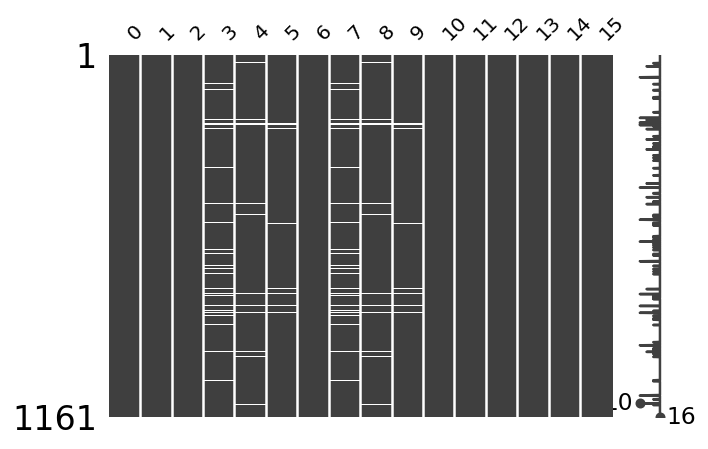

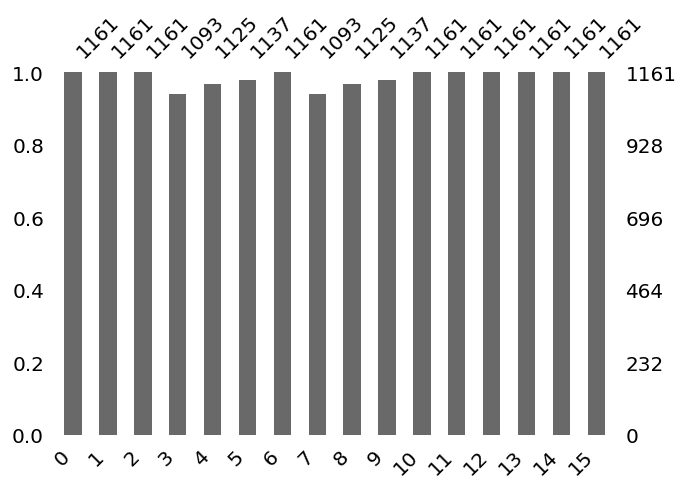

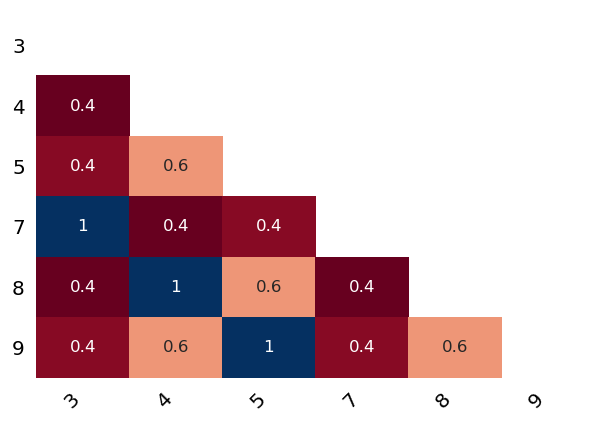


Choose the missing mechanism [a/b/c/d]:
a.MCAR b.MAR c.MNAR d.Skip
b
Imputation score of knn is 0.8990645263177452
Imputation score of matrix factorization is 0.8990645263177452
Imputation score of multiple imputation is 0.8982061572190327
Imputation method with the highest socre is knn



The recommended approach is knn
Do you want to apply the recommended approach? [y/n]y

Applying knn imputation ...
Missing values cleaned!


In [26]:
features_new, Xy_filled = handle_missing(features, df_no_duplicate)

## Outlier

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
import time
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
def compute_clustering_metafeatures(X):
    X = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)
    kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
    labels = kmeans_model.labels_
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    calinski_harabaz_score = metrics.calinski_harabaz_score(X, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
    return silhouette_score, calinski_harabaz_score, davies_bouldin_score
def pipeline(X, y, estimator):
#     if scipy.sparse.issparse(X) == True: # Check if X is sparse array
#         X = X.toarray()
    start_time_pipeline = time.process_time()
    pipe = Pipeline([('Imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('classifiers', estimator)])
    
    # to prevent sklearn cross_val_score failure due to label imabalance
#     pred = cross_val_predict(pipe, X, y, cv=5)
#     score = roc_auc_score(y, pred)
    score = np.mean(cross_val_score(pipe, X, y, cv=10, scoring='accuracy', n_jobs=-1))
    time_pipeline = time.process_time() - start_time_pipeline
    return score, time_pipeline

def compute_metafeatures(X, y):
    """
    The following landmarking features are computed:
        Naive Bayes Learner;
        Linear Discriminant Learner;
        One Nearest Neighbor Learner;
        Decision Node Learner;
        Randomly Chosen Node Learner
    """
    
    # if regression
    if len(np.unique(y)) > 100 or len(np.unique(y)) > 0.1*y.shape[0]:
        print("regression")
        print("meta features cannot be extracted as the target is not categorical")
    # if classification
    else:
#         print("classification")
        metafeatures_clf = {}
        # compute clustering performance metafeatures
        metafeatures_clf['silhouette'], metafeatures_clf['calinski_harabaz'], metafeatures_clf['davies_bouldin'] = compute_clustering_metafeatures(X)
    
        # compute landmarking metafeatures
        metafeatures_clf['naive_bayes'], metafeatures_clf['naive_bayes_time'] = pipeline(X, y, GaussianNB()) 
        metafeatures_clf['linear_discriminant_analysis'], metafeatures_clf['linear_discriminant_analysis_time'] = pipeline(X, y, LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')) 
        metafeatures_clf['one_nearest_neighbor'], metafeatures_clf['one_nearest_neighbor_time'] = pipeline(X, y, KNeighborsClassifier(n_neighbors = 1)) 
        metafeatures_clf['decision_node'], metafeatures_clf['decision_node_time'] = pipeline(X, y, DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=1, random_state=0)) 
        metafeatures_clf['random_node'], metafeatures_clf['random_node_time'] = pipeline(X, y, DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=1, random_state=0))
        metafeatures = list(metafeatures_clf.values())
    
    return metafeatures

In [28]:
def predict_best_anomaly_algorithm(X, y):
    """
    Predict best anomaly detection algorithm
    0: isolation forest;
    1: lof
    2: one svm
    """
    # extract metafeatures of this dataset
    mf = np.array(compute_metafeatures(X, y))
    mf = mf.reshape(-1, mf.shape[0])
    mf.shape
    
    # load meta learner
    metalearner = joblib.load('metalearner_rf.pkl')
    best_anomaly_algorithm = metalearner.predict(mf)
    if best_anomaly_algorithm[0] == 0:
        print("The recommended approach is isolation forest.")
    elif best_anomaly_algorithm[0] == 1:
        print("The recommended approach is local outlier factor.")
    elif best_anomaly_algorithm[0] == 2:
        print("The recommended approach is one class support vector machine.")
    else:
        print("Error in prediction.")
    ans = input("Do you want to apply the recommended outlier detection approach? [y/n]")
    if ans == "y":
        best = best_anomaly_algorithm[0]
    else:
        print("Choose the approach you want to apply [a/b/c/d]: ")
        print("a.Isolation Forest b.Local Outlier Factor c.One Class SVM d.Skip")
        ans = input()
        if ans == 'b':
            best = 1
            print("Applying local outlier factor ...")
        elif ans == 'c':
            best = 2
            print("Applying one class svm ...")
        else:
            best = 0
            print("Applying isolation forest ...")
    return best

In [29]:
def highlight_outlier(data):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_outlier = ~(np.abs(data - data.mean()) < (3 * data.std()))
    return ['background-color: yellow' if v else '' for v in is_outlier]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn import svm
def identify_outliers(df,algorithm=0, detailed=False):
    """
    Identify outliers in multi dimension for openml dataset where dataset has already been parsed
    """

#     df_exclude_target = df[df.columns.difference([target])] # exclude target from data
    df_exclude_target = df.iloc[:,:-1]
    df_numeric = df_exclude_target.select_dtypes(include=[np.number]) # keep only numeric type features
    total_length = len(df_numeric) # total length of the dataframe, used for computing contamination later
#     print(total_length)
    
    outliers_count = np.zeros(len(df_numeric.columns)) # number of outliers of each feature
    dict_outliers = {}
    flag = False
    df_union = pd.DataFrame()
    for i, col in enumerate(df_numeric.columns):
#         if(df_numeric[col].dtype in [np.number]): # bug! to be figured out 

        # first detect outliers in each column
        # keep only the ones that are out of +3 to -3 standard deviations in the column 'Data'.
        dict_outliers[col] = df_numeric[~(np.abs(df_numeric[col]-df_numeric[col].mean())<(3*df_numeric[col].std()))] # ~ means the other way around
        # combine all the rows containing outliers in one feature
        df_union = df_union.combine_first(dict_outliers[col])
#             print(dict_outliers[col])
        if len(dict_outliers[col]) != 0:
            outliers_count[i] = len(dict_outliers[col])
            flag = True
            if detailed:                    
                print("There are {} outliers in variable {}".format(len(dict_outliers[col]), col))
                print(dict_outliers[col][col])
                print("")
        else:
            if detailed:
                print("No outliers are detected in variable {}".format(col))
                print("")
    
    # boxplot: show outliers in each feature
    # feature scaling
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df_numeric)
    df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
    df_scaled.head()
    # draw box plot for numeric variables
    fig = plt.figure(figsize=(6, 4))
    fig.subplots_adjust(top=0.93, wspace=0)
    ax = sns.boxplot(data=df_scaled, palette="Set1")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    
    # Two options to estimate the propotion of outliers
    # One is to take the number of outliers in the feature containing most outliers
    # The other is to take the length of the union of rows containing outliers in any feature
#     print(outliers_count)
#     print(df_union)
#     max_outliers = max(outliers_count)
    max_outliers = len(df_union) 
#     print("max outliers number is {}".format(max_outliers))
#     if flag:
#         print("Outliers detected")
#         print("")
#     else:
#         print("No outliers detected")
#         print("")
#     plt.show()
    contamination = max_outliers / total_length
    X = np.asarray(df_numeric)
    # to be extended later, for now isolation forest
    if algorithm == 2:
        clf = svm.OneClassSVM(nu=0.95 * contamination + 0.05)
        clf.fit(X)
        y_pred = clf.predict(X)
    elif algorithm == 1:
        clf = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
        y_pred = clf.fit_predict(X)
    else:
        clf = IsolationForest(contamination = contamination)
        clf.fit(X)
        y_pred = clf.predict(X)
#     print(y_pred)
    outlier_index, = np.where(y_pred == -1)
    df_outliers = df_numeric.iloc[outlier_index.tolist()]
#     print(outlier_index)
    if algorithm == 1:
        anomaly_score = y_pred # decision function only available for novelty detection for in lof
    else:
        anomaly_score = clf.decision_function(X) # p_pred: The anomaly score of the input samples. The lower, The more abnormal.
    anomaly_score = pd.DataFrame(anomaly_score, columns=['anomaly_score'])
    df_with_anomaly_score = pd.concat([df, anomaly_score], axis=1)
    df_with_anomaly_score
    df_sorted = df_with_anomaly_score.sort_values(by='anomaly_score')
    cm = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
    df_styled = df_sorted.style.background_gradient(cmap=cm, subset=['anomaly_score']).apply(highlight_outlier, subset=df_sorted.columns[:-1])
#     print("*********************************************")
#     print("Outliers detected in multi dimensional space:")
#     print("*********************************************")

#     print(df_numeric.iloc[outlier_index.tolist()])
    df_pred = pd.DataFrame(y_pred, columns=['pred'])
    display(df_styled)
    return df_scaled, df_styled, df_outliers, df_pred, outliers_count

In [46]:
def visualize_outliers_scatter(df, df_pred):
    """
    Select out the two features most likely to have outliers
    and show them in a scatter plot
    """
    df_exclude_target = df.iloc[:,:-1]
    df_numeric = df_exclude_target.select_dtypes(include=[np.number]) # keep only numeric type features
    total_length = len(df_numeric) # total length of the dataframe, used for computing contamination later
 

    outliers_count = np.zeros(len(df_numeric.columns)) # number of outliers of each feature
    dict_outliers = {}
    flag = False
    df_union = pd.DataFrame()
    for i, col in enumerate(df_numeric.columns):
    #         if(df_numeric[col].dtype in [np.number]): # bug! to be figured out 
        if(df_numeric[col].dtype == np.float64 or df_numeric[col].dtype == np.int64): 
            # first detect outliers in each column
            # keep only the ones that are out of +3 to -3 standard deviations in the column 'Data'.
            dict_outliers[col] = df_numeric[~(np.abs(df_numeric[col]-df_numeric[col].mean())<(3*df_numeric[col].std()))] # ~ means the other way around
            # combine all the rows containing outliers in one feature
            df_union = df_union.combine_first(dict_outliers[col])
    #             print(dict_outliers[col])
            if len(dict_outliers[col]) != 0:
                outliers_count[i] = len(dict_outliers[col])

#     print(outliers_count)

    # get the index of the two features most likely to have outliers
    index_max2 = outliers_count.argsort()[-2:][::-1] # [::-1] reverse

    df_max2=df_numeric.iloc[:,index_max2]
#     print(df_max2.head())

    # draw scatter plot
    df_max2_anomaly=df_max2.loc[df_pred['pred'] == -1]
    df_max2_normal=df_max2.loc[df_pred['pred'] == 1]
    graph = sns.jointplot(x = df_max2[df_max2.columns.values[0]], 
                          y = df_max2[df_max2.columns.values[1]], 
                          color = 'skyblue', 
                          size = 4,
                          space = 0,
                          s = 5)
    graph.x = df_max2_anomaly[df_max2.columns.values[0]]
    graph.y = df_max2_anomaly[df_max2.columns.values[1]]
    graph.plot_joint(plt.scatter,c='firebrick', s=5)
    plt.show()


from pandas.plotting import parallel_coordinates
def visualize_outliers_parallel_coordinates(df_scaled, df_pred):
    df_final = pd.concat([df_scaled, df_pred], axis=1)
    df_final[df_final.columns[-1]] = df_final[df_final.columns[-1]].map({1:'Normal', -1:'Anomaly'})
#     print(df_final.head())
    fig = plt.figure(figsize=(6, 4))
    title = fig.suptitle("Parallel Coordinates", fontsize=18)
    fig.subplots_adjust(top=0.93, wspace=0)
    pc = parallel_coordinates(df_final, df_final.columns[-1], color=('skyblue', 'firebrick'), sort_labels=True)
    pc.set_xticklabels(pc.get_xticklabels(), rotation=40, ha="right")

    plt.show()

In [47]:
def drop_outliers(df, df_outliers):
    df_no_outliers = df.drop(df_outliers.index.values)
    return df_no_outliers

def handle_outlier(Xy):
    display(HTML('<h2>Outliers</h2>'))
    display(HTML('<h4>Recommend Algorithm ... </h4>'))
    X = Xy[:,:-1]
    y = Xy[:,-1]
    best = predict_best_anomaly_algorithm(X, y)
    df = pd.DataFrame(Xy)
    display(HTML('<h4>Visualize Outliers ... </h4>'))
    df_scaled, df_styled, df_outliers, df_pred, outliers_count = identify_outliers(df, algorithm=best)
#     print("Count for normal data and outliers")
#     print(df_pred['pred'].value_counts())
    visualize_outliers_scatter(df, df_pred)
    visualize_outliers_parallel_coordinates(df_scaled, df_pred)
    print("")
    display(HTML('<h4>Drop Outliers ... </h4>'))
    ans = input("Do you want to drop outliers? [y/n]")
    if ans == 'y':
        print("Outliers are dropped.")
        df_no_outliers = drop_outliers(df, df_outliers)
        return df_no_outliers
    else:
        print("Outliers are kept.")
        return df


The recommended approach is isolation forest.
Do you want to apply the recommended outlier detection approach? [y/n]y


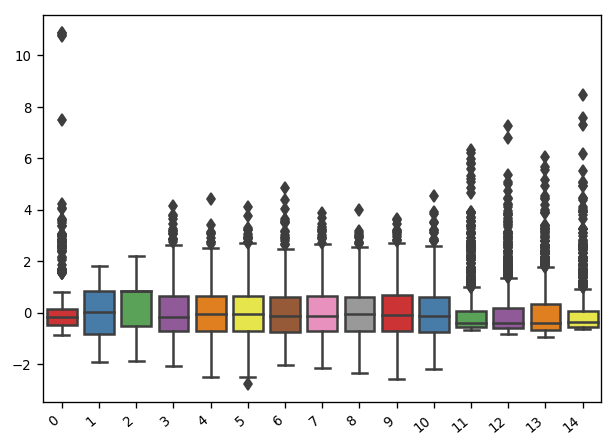

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,anomaly_score
47,1131,4,0,970,733,576,866,1204,909,717,1075,173,40,44,0,0,-0.155069
708,2785,34,0,887,591,507,683,1172,785,674,905,532,337,252,42,1,-0.154848
77,1305,4,0,952,658,519,824,1144,814,653,1000,533,139,145,0,1,-0.149458
657,6964,31,0,846,611,478,665,1045,780,624,838,601,393,258,90,1,-0.148945
904,3378,38,0,881,622,532,744,1086,831,712,945,541,240,212,0,1,-0.145011
388,2178,19,0,903,637,528,757,1124,806,678,951,583,177,164,36,1,-0.140939
385,2155,19,0,1009,559,500,793,1236,723,653,989,654,149,255,8,1,-0.140416
480,9092,22,0,777,577,460,605,955,731,595,760,850,419,472,9,1,-0.137121
262,1774,14,0,894,586,515,742,1104,724,636,916,467,138,161,36,1,-0.123724
90,1328,4,0,802,574,484,641,1016,751,636,825,485,354,286,27,1,-0.117959


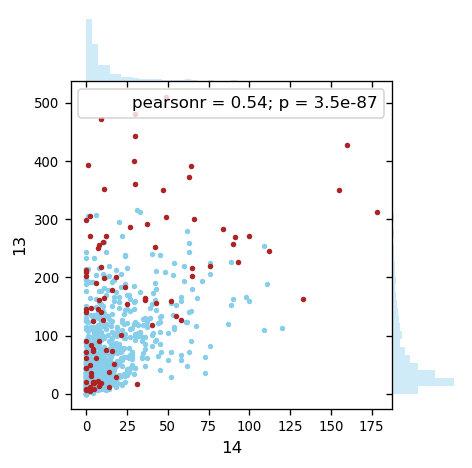

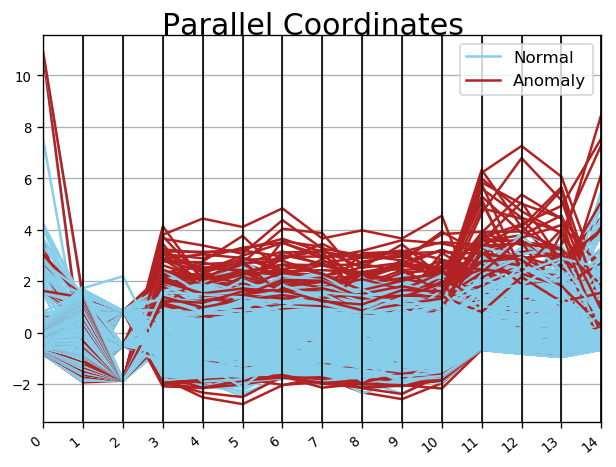

Do you want to drop outliers? [y/n]n
Outliers are kept.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1061.0,0.0,2.0,454.0,382.000000,362.0,382.0,567.0,485.000000,471.0,487.0,6.0,11.0,9.0,4.0,0.0
1,1063.0,0.0,0.0,686.0,560.000000,432.0,508.0,914.0,753.000000,572.0,677.0,74.0,125.0,118.0,40.0,1.0
2,1065.0,0.0,1.0,533.0,494.000000,329.0,415.0,716.0,663.000000,442.0,559.0,9.0,26.0,20.0,9.0,0.0
3,11462.0,0.0,1.0,612.0,507.000000,414.0,498.0,825.0,681.000000,557.0,670.0,115.0,124.0,101.0,21.0,1.0
4,1002.0,1.0,1.0,442.0,369.000000,310.0,350.0,530.0,444.000000,376.0,423.0,59.0,77.0,102.0,24.0,1.0
5,1004.0,1.0,1.0,441.0,385.000000,310.0,388.0,542.0,473.000000,383.0,477.0,57.0,33.0,35.0,2.0,0.0
6,1008.0,1.0,2.0,466.0,394.000000,351.0,396.0,558.0,476.000000,427.0,478.0,20.0,18.0,30.0,0.0,0.0
7,1009.0,1.0,0.0,580.0,437.000000,374.0,455.0,692.0,527.000000,451.0,546.0,366.0,354.0,301.0,66.0,1.0
8,1012.0,1.0,2.0,498.0,379.000000,322.0,401.0,655.0,501.000000,404.0,523.0,34.0,25.0,27.0,3.0,0.0
9,1016.0,1.0,2.0,506.0,412.000000,359.0,411.0,607.0,508.000000,445.0,503.0,67.0,40.0,66.0,27.0,0.0


In [48]:
handle_outlier(Xy_filled)